In [1]:
#  This is a segmentation that composed of two helper packages:  
#  1. keras_unet - for all the visualizations
#  2. segmentation-models for the Unet model
#
#





!pip install -–upgrade pip
!pip install keras_unet
!pip install scikit-learn
!pip install scipy
!pip install -U segmentation-models


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -–
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 22.2 MB 19.9 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 71.3 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 73.1 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 50 kB 23.3 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 13.8 MB/s eta 0:00:01    |█████████████████████▎        

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import sys
from PIL import Image

In [3]:
!pwd

/tf/segmentation/cells


## Load data

In [4]:
masks = glob.glob("Data/train/label/label/*.png")
orgs = glob.glob("Data/train/image/image/*.png")


In [5]:
imgs_list = []
masks_list = []
for image, mask in zip(orgs, masks):
    #mask = np.where(mask == 255, 0, 255)
    #mask = np.where(an_array = 0, 255, mask)
    #mask = np.where(an_array = 2, 0, mask)
    imgs_list.append(np.array(Image.open(image).convert('RGB').resize((512,512))))
    
    im = Image.open(mask).resize((512,512))
    
    masks_list.append(np.array(im))
    
imgs_np = np.asarray(imgs_list)
masks_np = np.asarray(masks_list)

#new_masks_list= []
#for i in masks_np:
#  m = np.where(i == 255, 0, 255)
#  new_masks_list.append(m)
#new_masks_np = np.asarray(new_masks_list)
#masks_np = new_masks_np

In [6]:
print(imgs_np.shape, new_masks_np.shape)

NameError: name 'new_masks_np' is not defined

## Plot images + masks + overlay (mask over original)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

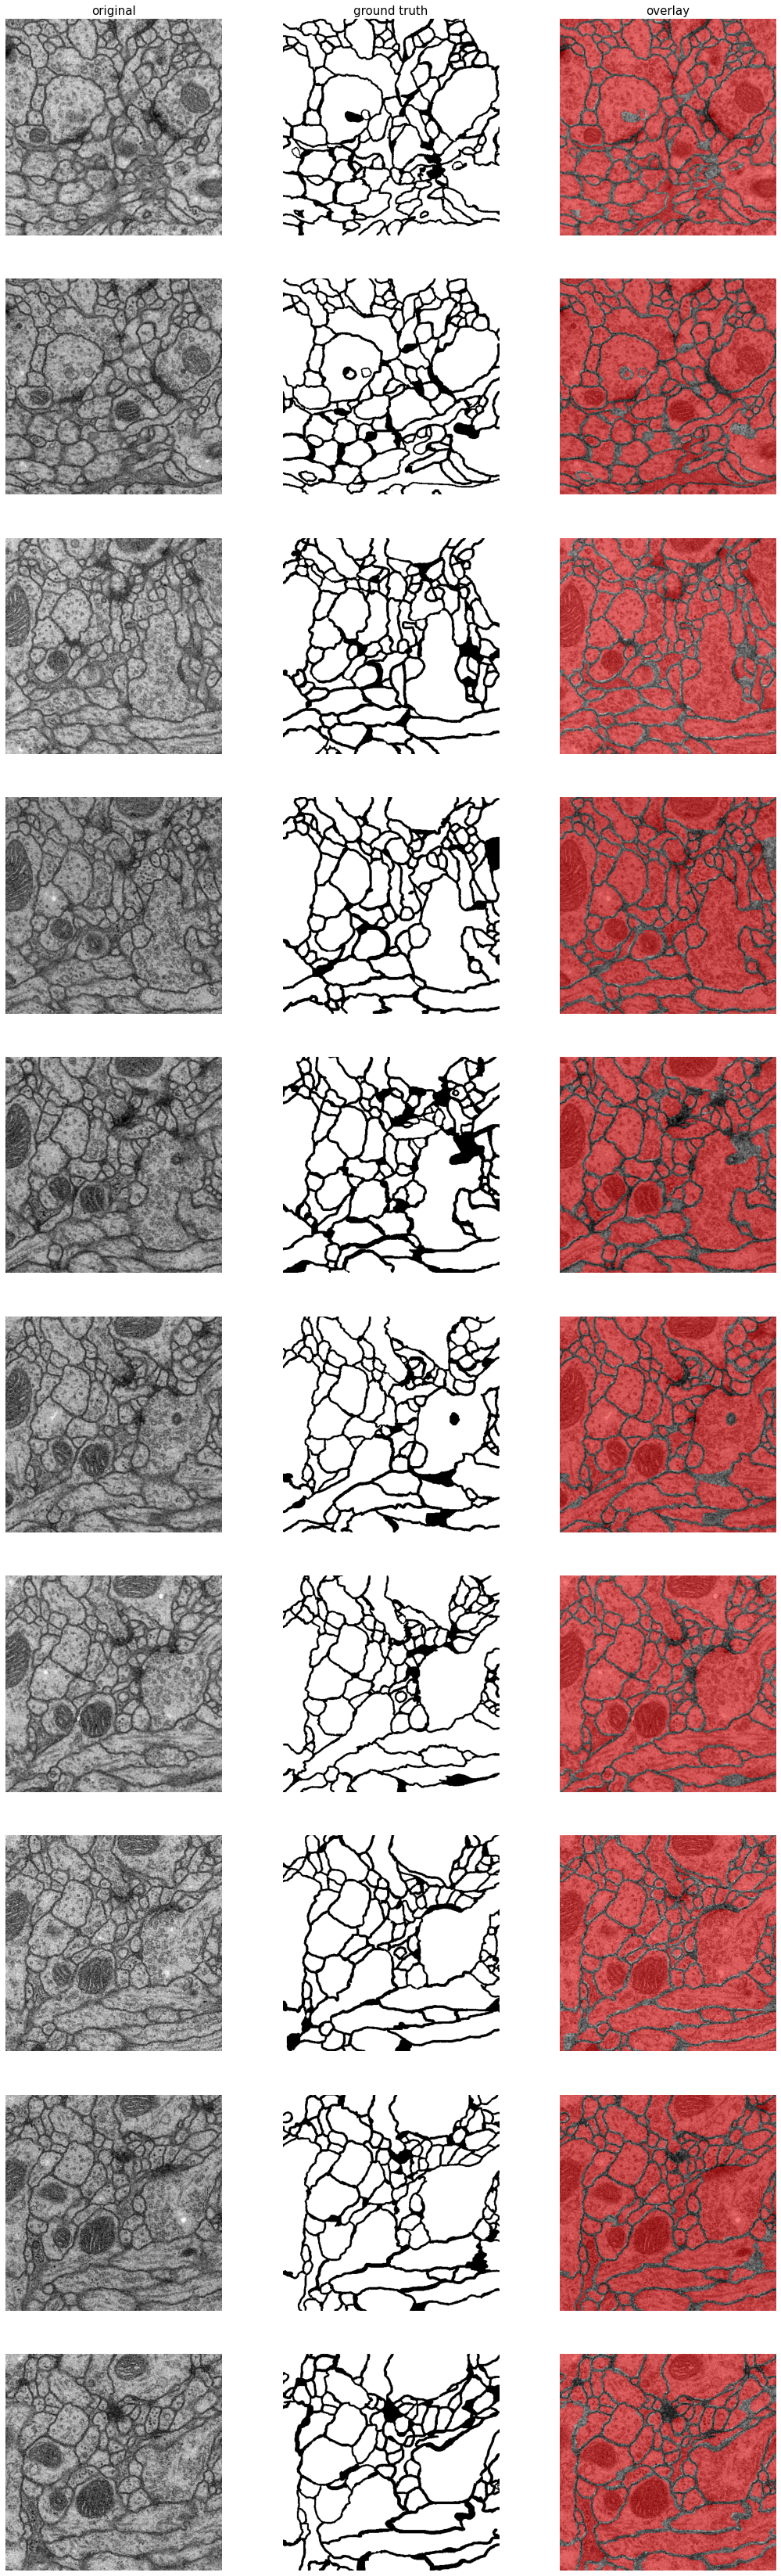

In [7]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=imgs_np, mask_imgs=masks_np, nm_img_to_plot=10, figsize=6)


## Get data into correct shape, dtype and range (0.0-1.0)

In [14]:
print(imgs_np.max(), masks_np.max())

255 255


In [117]:
print(np.unique(imgs_np), np.unique(masks_np))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [15]:
x = np.asarray(imgs_np, dtype=np.float32)/255
#x = np.asarray(imgs_np, dtype=np.float32)
#x = imgs_np
y = np.asarray(masks_np, dtype=np.float32)/255
#y = np.asarray(masks_np, dtype=np.float32)

In [16]:
print(x.max(), y.max())

1.0 1.0


In [17]:
print(x.shape, y.shape)

(30, 512, 512, 3) (30, 512, 512)


In [18]:
y = y.reshape(y.shape[0], y.shape[1], y.shape[2], 1)
print(x.shape, y.shape)

(30, 512, 512, 3) (30, 512, 512, 1)


In [19]:
#x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)
print(x.shape, y.shape)

(30, 512, 512, 3) (30, 512, 512, 1)


##  Train/val split

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=0)

print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (27, 512, 512, 3)
y_train:  (27, 512, 512, 1)
x_val:  (3, 512, 512, 3)
y_val:  (3, 512, 512, 1)


## Prepare train generator with data augmentation

Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
(6, 512, 512, 3)


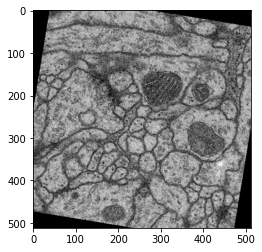

(6, 512, 512, 3)


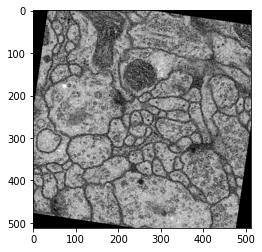

(6, 512, 512, 3)


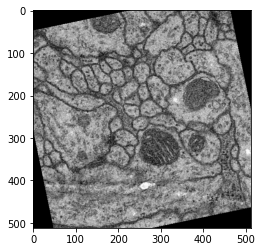

(6, 512, 512, 3)
[0. 1.]


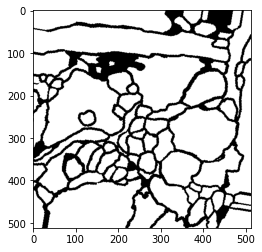

(6, 512, 512, 3)
[0. 1.]


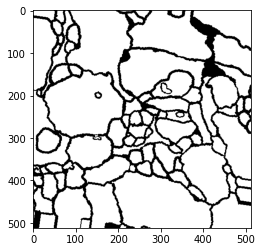

(6, 512, 512, 3)
[0. 1.]


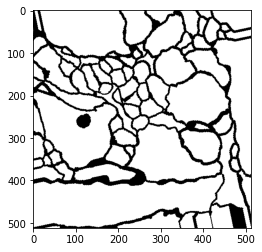

In [59]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from PIL import Image
import numpy as np
from keras_unet.metrics import iou, iou_thresholded

img_width, img_height = 512,512

batch_size = 6
seed = 4
train_samples =30
import matplotlib.pyplot as plt

image_datagen = ImageDataGenerator(
         horizontal_flip=True,
         vertical_flip=True,
         rescale=1. / 255,
      #   preprocessing_function=add_noise,
       #  width_shift_range=[0,40], 
       #  zoom_range=[0.9,1.1],
          rotation_range=15,
      #    shear_range=0.1,
           fill_mode='constant', cval=0
           
    )

mask_datagen = ImageDataGenerator(
         horizontal_flip=True,
         vertical_flip=True,
         rescale=1. / 255,
      #   preprocessing_function=add_noise,
  #       width_shift_range=[0,40], 
  #       zoom_range=[0.9,1.1],
          rotation_range=15,
 #         shear_range=0.1,
  #        fill_mode='constant', cval=0
           
    )



image_generator = image_datagen.flow_from_directory(
   "Data/train/image/", #"./oxford_pets_new/train/image/",
   # "./oxford_pets_new/cells/train/images/",
   # "./oxford_pets_new/train/image/",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,seed=seed)
                                
mask_generator = mask_datagen.flow_from_directory(
    "Data/train/label/", #"./oxford_pets_new/train/image/",
   # "./oxford_pets_new/cells/train/mask/",
   # "./oxford_pets_new/train/mask/",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,seed=seed)     

def my_image_mask_generator(image_data_generator, mask_data_generator):
    train_generator = zip(image_data_generator, mask_data_generator)
    for (img, mask) in train_generator:
        yield (img, mask)
#train_generator = my_image_mask_generator(image_generator, mask_generator)


train_generator = zip(image_generator, mask_generator)



for i in range(3):
  img = image_generator.next()
  print(img.shape)   
  plt.imshow(img[0])
  plt.show()
  

for i in range(3):
  msk = mask_generator.next()
  print(msk.shape)   #  (1,256,256,3)
  msk[0] = np.round_(msk[0])  
  print(np.unique(msk[0]))
  plt.imshow(msk[0])
  plt.show()
                    
  

Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
(6, 512, 512, 3)


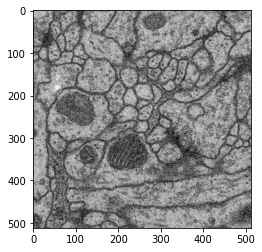

(6, 512, 512, 3)
[0. 1.]


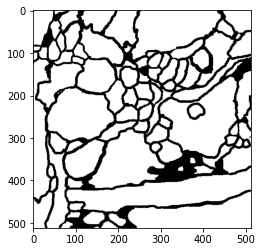

In [58]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from PIL import Image
import numpy as np
from keras_unet.metrics import iou, iou_thresholded

img_width, img_height = 512,512

batch_size = 6
seed = 4
train_samples =30
import matplotlib.pyplot as plt

val_image_datagen = ImageDataGenerator(
       #  horizontal_flip=True,
        # vertical_flip=True,
         rescale=1. / 255,
      #   preprocessing_function=add_noise,
       #  width_shift_range=[0,40], 
       #  zoom_range=[0.9,1.1],
      #    rotation_range=15,
      #    shear_range=0.1,
           fill_mode='constant', cval=0
           
    )

val_mask_datagen = ImageDataGenerator(
   #      horizontal_flip=True,
        # vertical_flip=True,
         rescale=1. / 255,
      #   preprocessing_function=add_noise,
  #       width_shift_range=[0,40], 
  #       zoom_range=[0.9,1.1],
  #        rotation_range=15,
 #         shear_range=0.1,
  #        fill_mode='constant', cval=0
           
    )



val_image_generator = val_image_datagen.flow_from_directory(
   "Data/train/image/", 

    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,seed=seed)
                                
val_mask_generator = val_mask_datagen.flow_from_directory(
    "Data/train/label/",
  
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,seed=seed)     

def val_my_image_mask_generator(image_data_generator, mask_data_generator):
    train_generator = zip(image_data_generator, mask_data_generator)
    for (img, mask) in train_generator:
        yield (img, mask)
val_generator = val_my_image_mask_generator(val_image_generator, val_mask_generator)


#val_generator = zip(val_image_generator, val_mask_generator)



for i in range(1):
  img = val_image_generator.next()
  print(img.shape)   #  (1,256,256,3)
  plt.imshow(img[0])
  plt.show()
   

for i in range(1):
  msk = val_mask_generator.next()
  print(msk.shape)   #  (1,256,256,3)
  msk[0] = np.round_(msk[0])  
  print(np.unique(msk[0]))
  plt.imshow(msk[0])
  plt.show()

## Initialize network

In [42]:
import segmentation_models as sm
sm.set_framework('tf.keras')
sm.framework()
import segmentation_models as sm

BACKBONE = 'inceptionv3'
preprocess_input = sm.get_preprocessing(BACKBONE)

# load your data


# define model
model = sm.Unet(BACKBONE, input_shape=(512,512,3),encoder_weights=None,classes=1, activation='sigmoid')



In [128]:
#model.summary()

## Compile + train

In [43]:
from keras.callbacks import ModelCheckpoint


model_filename = 'segm_model_v0_.h5'
callback_checkpoint = ModelCheckpoint(
    model_filename, 
    verbose=1, 
    monitor='val_loss', 
    save_best_only=True,
)

In [32]:
#from tensorflow.keras.optimizers import Adam, SGD
#from keras_unet.metrics import iou, iou_thresholded
#from keras_unet.losses import jaccard_distance

#model.compile(
    #optimizer=Adam(learning_rate=0.01), 
    #optimizer=SGD(learning_rate=0.01, momentum=0.99),
#    loss='binary_crossentropy',
    #loss=jaccard_distance,
#    metrics=["accuracy"]
#)


In [54]:
from tensorflow.keras.optimizers import Adam, SGD

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=sm.losses.bce_jaccard_loss,#sm.losses.bce_jaccard_loss, #keras.losses.BinaryCrossentropy(),#sm.losses.bce_jaccard_loss,#"BinaryCrossentropy"
    metrics=[sm.metrics.iou_score]
)

Epoch 1/5
5/5 [==============================] - 8s 2s/step - loss: 0.3194 - iou_score: 0.8645 - val_loss: 0.2946 - val_iou_score: 0.8723

Epoch 00001: val_loss did not improve from 0.10767
Epoch 2/5
5/5 [==============================] - 8s 2s/step - loss: 0.4878 - iou_score: 0.8314 - val_loss: 0.2918 - val_iou_score: 0.8724

Epoch 00002: val_loss did not improve from 0.10767
Epoch 3/5
5/5 [==============================] - 8s 2s/step - loss: 0.5021 - iou_score: 0.8283 - val_loss: 0.2994 - val_iou_score: 0.8700

Epoch 00003: val_loss did not improve from 0.10767
Epoch 4/5
5/5 [==============================] - 8s 2s/step - loss: 0.5114 - iou_score: 0.8266 - val_loss: 0.3051 - val_iou_score: 0.8698

Epoch 00004: val_loss did not improve from 0.10767
Epoch 5/5
5/5 [==============================] - 8s 2s/step - loss: 0.4647 - iou_score: 0.8344 - val_loss: 0.3200 - val_iou_score: 0.8673

Epoch 00005: val_loss did not improve from 0.10767
--------------------------------------------------

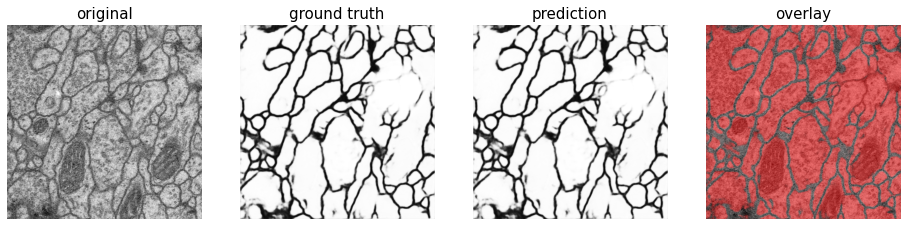

In [74]:
from keras_unet.utils import plot_imgs
from random import seed
from random import randint

for j in range(1):
    for i in range(1):
        seed = randint(0, 100)  
        history = model.fit(
        train_generator,    
        steps_per_epoch=5,
        epochs=5,
      validation_data=val_generator,
            validation_steps=5,
        callbacks=[callback_checkpoint]
    )
        
        print("------------------------------------------------------")
        print("counter=", (j+1)*(i+1)*10)
        print("------------------------------------------------------")
        
        img = Image.open("Data/test/20.png").convert('RGB') 
        img = np.array(img.resize((512,512)))
        img = np.asarray(img, dtype=np.float32)/255
        img = img.reshape(1,img.shape[0], img.shape[1], img.shape[2])

        y_pred = model.predict(img)
        #_pred = np.where(y_pred < 100, 0, 255)
        from keras_unet.utils import plot_imgs
        #mask = Image.open("Data/test/label/label/19.png")
        #mask = mask.resize(512,512)
        #mask = np.asarray(mask, dtype=np.float32)/255
        #mask = img.reshape(1,mask.shape[0], mask.shape[1], mask.shape[2])
        #mask.show()
        plot_imgs(org_imgs=img, mask_imgs=y_pred ,pred_imgs=y_pred, nm_img_to_plot=1)


In [73]:
#print(history.history.keys())
#print(history.history['val_loss'])

dict_keys(['loss', 'iou_score', 'val_loss', 'val_iou_score'])
[0.30642271041870117, 0.30008044838905334, 0.29978829622268677, 0.3040831983089447, 0.31506970524787903]


## Plot training history

In [ ]:
#from keras_unet.utils import plot_segm_history

#plot_segm_history(history)

## Plot original + ground truth + pred + overlay (pred on top of original)

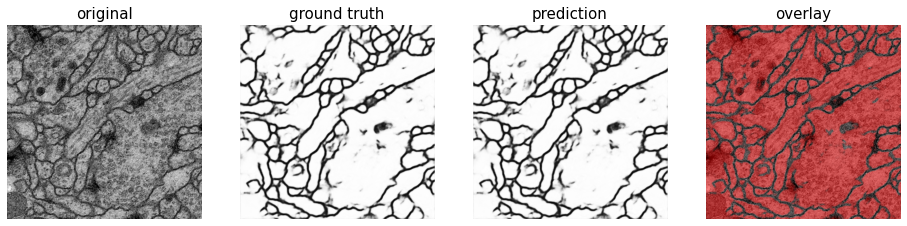

In [65]:
from keras.models import load_model

#model = load_wights("segm_model_v0.h5")
img = Image.open("Data/test/6.png").convert('RGB') 
img = np.array(img.resize((512,512)))
img = np.asarray(img, dtype=np.float32)/255
img = img.reshape(1,img.shape[0], img.shape[1], img.shape[2])
img.shape
y_pred = model.predict(img)
plot_imgs(org_imgs=img, mask_imgs=y_pred ,pred_imgs=y_pred, nm_img_to_plot=1)

(1, 512, 512, 3)

In [ ]:
#from keras_unet.utils import plot_imgs

#plot_imgs(org_imgs=img, mask_imgs=y_pred, pred_imgs=y_pred, nm_img_to_plot=1)